## Importación de librerias 

In [1]:
# pip install pandas numpy matplotlib seaborn wordcloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")

## Carga del archivo CSV

In [3]:
# cargar el documento csv con pd.read_csv, creando el dataframe
df = pd.read_csv('/Users/stam/Documents/Documents_MacBook_Eduardo/GitHub/jumping_spider_salticidae/datasets/salticidae_mexico_conabio.csv')

## Análisis exploratorio

In [4]:
# datos cargados
# muestra las primeras filas del dataframe
df.head(2)

,idejemplar,numcatalogo,numcolecta,coleccion,institucion,paiscoleccion,colector,fechacolecta,diacolecta,mescolecta,...,usvserieV,usvserieVI,usvserieVII,vegetacionserenanalcms,mt24claveestadomapa,mt24nombreestadomapa,mt24clavemunicipiomapa,mt24nombremunicipiomapa,incertidumbreXY,geoportal
0,2b8c370d2d52f42f8b330f461ac4d614,CARCIB-Ar-4298,AGP-48,CARCIB Colección Aracnológica,CIBNOR Centro de Investigaciones Biológicas de...,MEXICO,Alejandro García-Palacios,2017-08-28,28.0,8.0,...,SIN VEGETACIÓN APARENTE,SIN VEGETACIÓN APARENTE,SIN VEGETACIÓN APARENTE,NaN,NaN,NaN,NaN,NaN,NaN,1
1,72ad37ee59849904ebd0896a7ea23909,NaN,NaN,Naturalista Naturalista,CONABIO Comisión Nacional para el Conocimiento...,MEXICO,NaN,2019-08-13,13.0,8.0,...,AGRICULTURA DE TEMPORAL PERMANENTE,AGRICULTURA DE TEMPORAL PERMANENTE,AGRICULTURA DE TEMPORAL PERMANENTE,NaN,30.0,VERACRUZ DE IGNACIO DE LA LLAVE,30151.0,TAMIAHUA,4.0,1


In [5]:
# columnas del dataframe
df.columns

Index(['idejemplar', 'numcatalogo', 'numcolecta', 'coleccion', 'institucion',
       'paiscoleccion', 'colector', 'fechacolecta', 'diacolecta', 'mescolecta',
       ...
       'usvserieV', 'usvserieVI', 'usvserieVII', 'vegetacionserenanalcms',
       'mt24claveestadomapa', 'mt24nombreestadomapa', 'mt24clavemunicipiomapa',
       'mt24nombremunicipiomapa', 'incertidumbreXY', 'geoportal'],
      dtype='object', length=102)

In [6]:
# identifica el tipo de datos de cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11751 entries, 0 to 11750
Columns: 102 entries, idejemplar to geoportal
dtypes: float64(26), int64(1), object(75)
memory usage: 9.1+ MB


In [7]:
# dimensión del dataframe
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

Número de filas: 11751
Número de columnas: 102


## Limpiesa de datos

In [8]:
# se verifica la completitud de las variables (valores nulos existentes)
# se utiliza la función .sum() para sumar los elementos que están vacíos (.isnull())
nulos = df.isnull().sum()

# calculo del porcentaje de completitud
completitud = pd.DataFrame(100 - (nulos / len(df) * 100))

# reset_index se utiliza para resetear los índices
# inplace = True sirve para evitar la repetición
completitud.reset_index(inplace = True)
# se coloan encebezados
completitud = completitud.rename(columns = {"index":"variable",0:"completitud"})

# ordenamos las columnas con menor completitud en adelante
completitud.sort_values(by ='completitud', ascending = True)
completitud

,variable,completitud
0,idejemplar,100.000000
1,numcatalogo,13.224406
2,numcolecta,7.003659
3,coleccion,100.000000
4,institucion,100.000000
...,...,...
97,mt24nombreestadomapa,0.697813
98,mt24clavemunicipiomapa,0.697813
99,mt24nombremunicipiomapa,0.697813
100,incertidumbreXY,73.006553


In [9]:
# filtrar  arañas encontradas en México
df = df[df['paisoriginal'].str.contains('Mexico', na=False, case=False)]

In [10]:
# eliminacion de los datos duplicados
df.drop_duplicates(inplace=True)

# eliminacion de los datos faltantes
df = df.dropna(subset=[ 'paiscoleccion','familiavalida','generovalido','estadooriginal'])

# .fillna reemplazará todos los valores NaN (vacíos) en la columna "especievalida" con "sp."
# .replace reemplazará las celdas vacías ("") con ".sp" en la columna "especievalida"
df['especievalida'] = df['especievalida'].fillna('sp.').replace('', 'sp.')

# las columnas con menos del 80% de completitud son eliminadas
# define una serie de pandas  con el nombre de las columnas
cols_incompletas = completitud['variable'][completitud['completitud']<80]
# se eliminan esas columnas
df = df.drop(cols_incompletas, axis=1) # 1 columnas 0 filas
df.head(2)

,idejemplar,coleccion,institucion,paiscoleccion,fechacolecta,diacolecta,mescolecta,aniocolecta,fechadeterminacion,diadeterminacion,...,geovalidacion,validacionambiente,usvserieI,usvserieII,usvserieIII,usvserieIV,usvserieV,usvserieVI,usvserieVII,geoportal
0,2b8c370d2d52f42f8b330f461ac4d614,CARCIB Colección Aracnológica,CIBNOR Centro de Investigaciones Biológicas de...,MEXICO,2017-08-28,28.0,8.0,2017.0,2017-09-30,30.0,...,Válido municipio 2022,Válido,DESPROVISTO DE VEGETACIÓN,SIN VEGETACIÓN APARENTE,SIN VEGETACIÓN APARENTE,SIN VEGETACIÓN APARENTE,SIN VEGETACIÓN APARENTE,SIN VEGETACIÓN APARENTE,SIN VEGETACIÓN APARENTE,1
1,72ad37ee59849904ebd0896a7ea23909,Naturalista Naturalista,CONABIO Comisión Nacional para el Conocimiento...,MEXICO,2019-08-13,13.0,8.0,2019.0,2019-08-16,16.0,...,Válido país 2022. No aplica validación de esta...,Válido,NaN,AGRICULTURA DE TEMPORAL PLANTACION AGRICOLA PE...,AGRICULTURA DE TEMPORAL PLANTACION AGRICOLA PE...,AGRICULTURA DE TEMPORAL PLANTACION AGRICOLA PE...,AGRICULTURA DE TEMPORAL PERMANENTE,AGRICULTURA DE TEMPORAL PERMANENTE,AGRICULTURA DE TEMPORAL PERMANENTE,1


In [11]:
# se verifica la completitud de las variables (valores nulos existentes)
# se utiliza la función .sum() para sumar los elementos que están vacíos (.isnull())
nulos = df.isnull().sum()

# calculo del porcentaje de completitud
completitud = pd.DataFrame(100 - (nulos / len(df) * 100))

# reset_index se utiliza para resetear los índices
# inplace = True sirve para evitar la repetición
completitud.reset_index(inplace = True)
# se coloan encebezados
completitud = completitud.rename(columns = {"index":"variable",0:"completitud"})

# ordenamos las columnas con menor completitud en adelante
completitud.sort_values(by ='completitud', ascending = True)
completitud

,variable,completitud
0,idejemplar,100.000000
1,coleccion,100.000000
2,institucion,100.000000
3,paiscoleccion,100.000000
4,fechacolecta,99.512325
...,...,...
64,usvserieIV,99.068984
65,usvserieV,100.000000
66,usvserieVI,99.068984
67,usvserieVII,99.051250


In [12]:
completitud.sort_values(by='completitud', ascending=True).head(60)

,variable,completitud
26,especie,89.439617
27,estatustax,89.439617
30,autor,89.439617
8,fechadeterminacion,92.995212
9,diadeterminacion,92.995212
10,mesdeterminacion,93.607023
11,aniodeterminacion,94.183366
41,ambiente,94.218833
53,municipiooriginal,94.777443
17,urlorigen,95.238517


In [13]:
# dimensión del dataframe con eliminacion de datos duplicados
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

Número de filas: 11278
Número de columnas: 69


## Análisis exploratorio posterior a la limpieza de datos

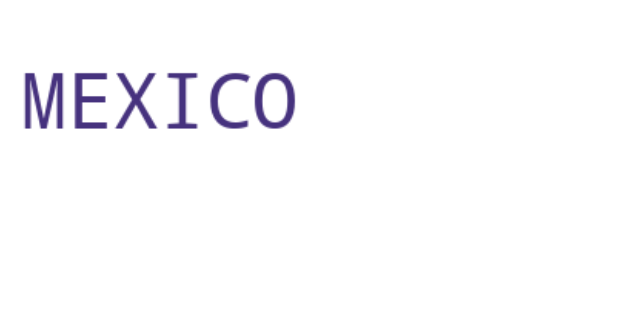

In [14]:
# word cloud
# generar el texto a partir de paiscoleccion 
text = " ".join(df['paisoriginal'].astype(str))

# crear la nube de palabras
wordcloud = WordCloud(
    max_words=50,
    max_font_size=50,
    colormap='viridis',
    background_color="white"
).generate(text)

# configurar y mostrar el gráfico
plt.figure(figsize=(8, 4))  # establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # mostrar la nube de palabras
plt.axis("off")  # ocultar ejes
plt.show()  # mostrar la figura

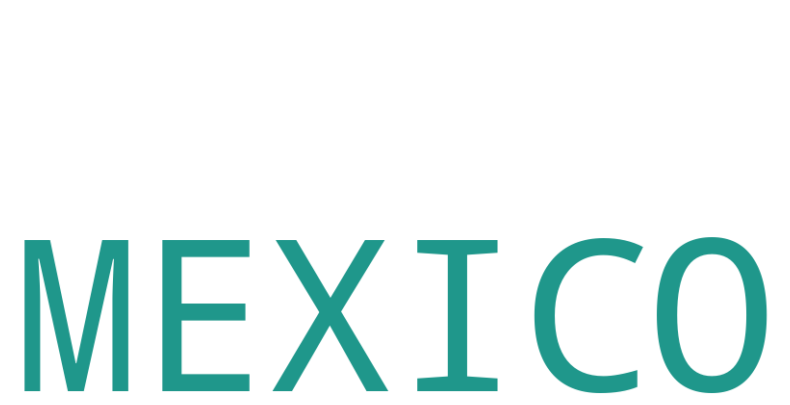

In [15]:
paisoriginal_df = df['paisoriginal'].value_counts()

# word cloud
# generar el texto a partir de generovalido 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(paisoriginal_df)

# mostrar la imagen de la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # ocultar los ejes
plt.show()

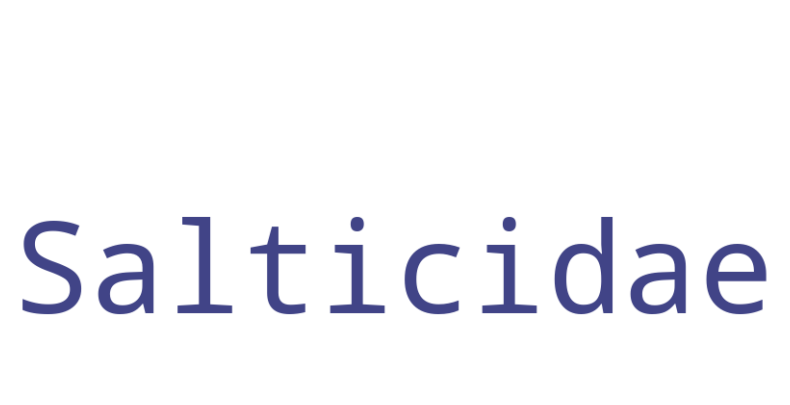

In [16]:
familiavalida_df = df['familiavalida'].value_counts()

# word cloud
# generar el texto a partir de familiavalida 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(familiavalida_df)

# mostrar la imagen de la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # ocultar los ejes
plt.show()

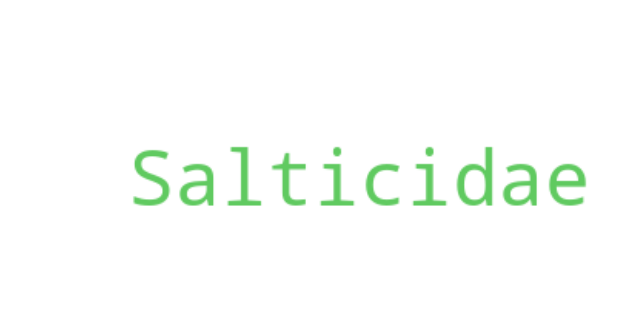

In [17]:
# word cloud
# generar el texto a partir de familiavalida 
text = " ".join(df['familiavalida'].astype(str))

# crear la nube de palabras
wordcloud = WordCloud(
    max_words=50,
    max_font_size=50,
    colormap='viridis',
    background_color="white"
).generate(text)

# configurar y mostrar el gráfico
plt.figure(figsize=(8, 4))  # establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # mostrar la nube de palabras
plt.axis("off")  # ocultar ejes
plt.show()  # mostrar la figura

In [18]:
#¿Cómo se distribuyen las arañas por género?
# Contar el número de especies por género

# Eliminar filas donde 'especievalida' contiene "sp."
generos_mas_comunes = df[~df['especievalida'].str.contains("sp.", na=False)]

# Contar el número de especies por género después de eliminar las filas
generos_mas_comunes_df = generos_mas_comunes['generovalido'].value_counts()

# Mostrar los géneros más comunes
print("Géneros más comunes en México:")
print(generos_mas_comunes_df.head(10))

Géneros más comunes en México:
generovalido
Paraphidippus    2578
Menemerus        1990
Phidippus        1915
Habronattus       588
Plexippus         400
Colonus           345
Messua            289
Hasarius          243
Sassacus          225
Metacyrba         150
Name: count, dtype: int64


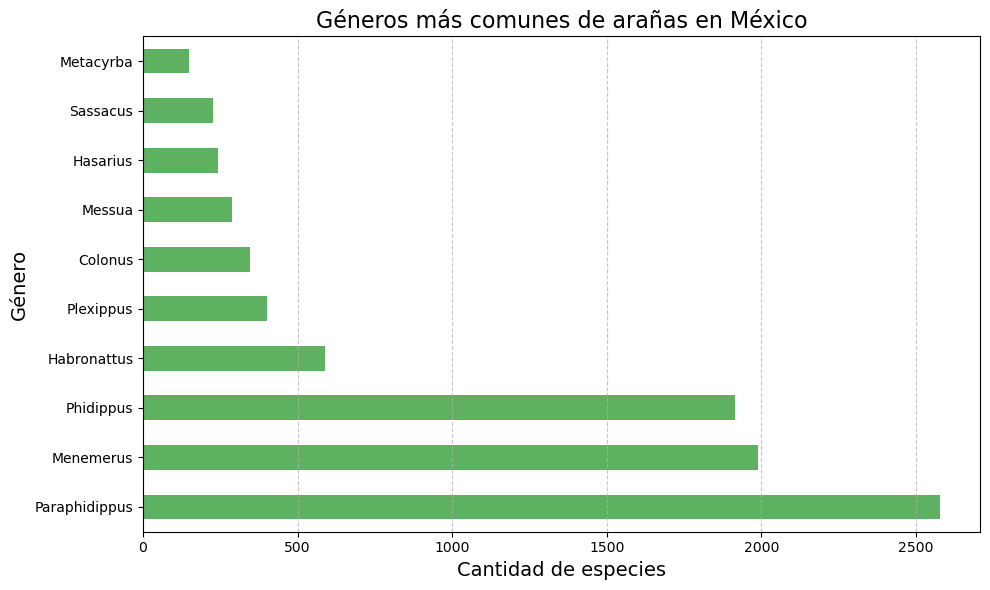

In [19]:
# graficar los géneros más comunes en México
generos_mas_comunes_df.head(10).plot(kind='barh', color='#5EB160', figsize=(10, 6))
plt.title('Géneros más comunes de arañas en México', fontsize=16)
plt.xlabel('Cantidad de especies', fontsize=14)
plt.ylabel('Género', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

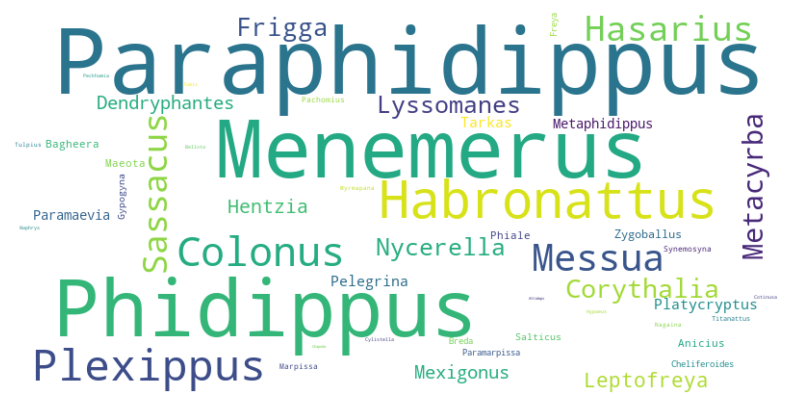

In [20]:
# word cloud
# generar el texto a partir de generovalido 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(generos_mas_comunes_df)

# mostrar la imagen de la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # ocultar los ejes
plt.show()

In [21]:
#¿Cuántas especies únicas hay en México?
# Contar especies únicas
especies_unicas = generos_mas_comunes['especievalida'].nunique()
print(f"Cantidad de especies únicas en México: {especies_unicas}")

Cantidad de especies únicas en México: 205


In [22]:
especies_unicas_df = generos_mas_comunes['especievalida'].value_counts()
especies_unicas_df.head(10)

especievalida
Paraphidippus aurantius    2064
Menemerus bivittatus       1853
Phidippus audax             520
Paraphidippus fartilis      507
Plexippus paykulli          391
Colonus sylvanus            339
Phidippus arizonensis       291
Messua limbata              285
Hasarius adansoni           243
Phidippus cruentus          212
Name: count, dtype: int64

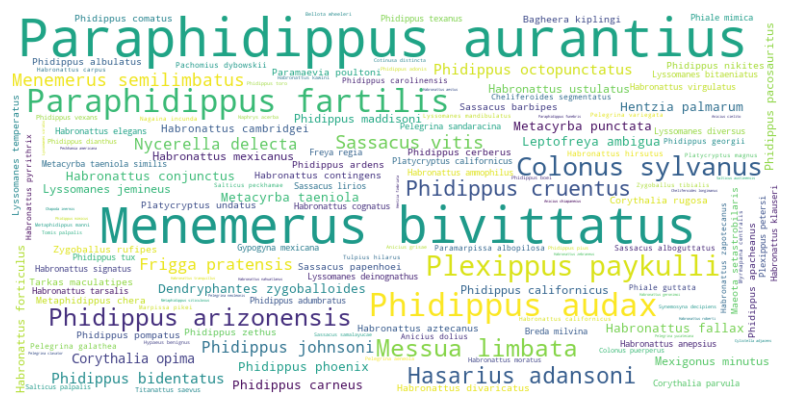

In [23]:
# word cloud
# generar el texto a partir de especiesvalido
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(especies_unicas_df)

# mostrar la imagen de la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # ocultar los ejes
plt.show()